In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df= pd.read_csv("heart_2020_cleaned.csv")

In [91]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [92]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

<AxesSubplot:>

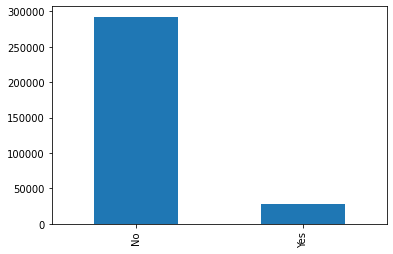

In [93]:
df['HeartDisease'].value_counts().plot(kind='bar')

In [94]:
df.shape

(319795, 18)

<AxesSubplot:>

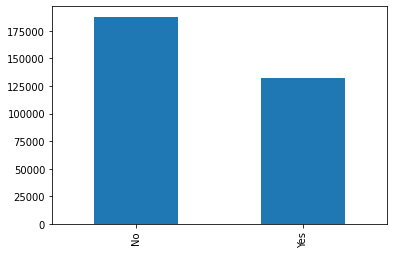

In [95]:
df['Smoking'].value_counts().plot(kind='bar')

<AxesSubplot:>

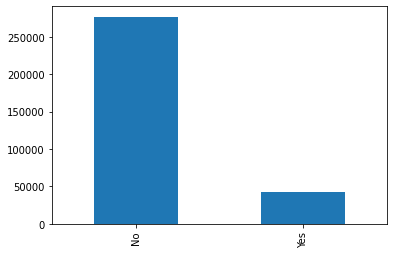

In [96]:
df['Asthma'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='DiffWalking'>

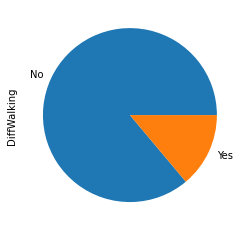

In [97]:
df['DiffWalking'].value_counts().plot(kind='pie')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [99]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test,y_train,y_test= train_test_split(df.drop(columns=['HeartDisease']), df[['HeartDisease']], test_size=0.2, random_state=42)

In [101]:
X_train.shape

(255836, 17)

In [102]:
df =pd.get_dummies(df,columns=['Smoking','AlcoholDrinking','Stroke','DiffWalking','SkinCancer','KidneyDisease','Asthma','PhysicalActivity','Diabetic'],drop_first=True)

In [103]:
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,SkinCancer_Yes,KidneyDisease_Yes,Asthma_Yes,PhysicalActivity_Yes,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,No,16.60,3.0,30.0,Female,55-59,White,Very good,5.0,1,0,0,0,1,0,1,1,0,1,0
1,No,20.34,0.0,0.0,Female,80 or older,White,Very good,7.0,0,0,1,0,0,0,0,1,0,0,0
2,No,26.58,20.0,30.0,Male,65-69,White,Fair,8.0,1,0,0,0,0,0,1,1,0,1,0
3,No,24.21,0.0,0.0,Female,75-79,White,Good,6.0,0,0,0,0,1,0,0,0,0,0,0
4,No,23.71,28.0,0.0,Female,40-44,White,Very good,8.0,0,0,0,1,0,0,0,1,0,0,0


In [104]:
df['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [105]:
df['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AlcoholDrinking_Yes', ylabel='Smoking_Yes'>

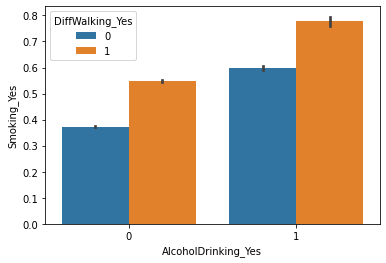

In [106]:
sns.barplot(df['AlcoholDrinking_Yes'],df['Smoking_Yes'],hue=df['DiffWalking_Yes'])

In [107]:
X_train,X_test,y_train,y_test= train_test_split(df.drop(columns=['HeartDisease','Race','GenHealth','AgeCategory']),df[['HeartDisease']], test_size=0.2)

In [108]:
mx=MinMaxScaler()

In [109]:
X_train

,BMI,PhysicalHealth,MentalHealth,Sex,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,SkinCancer_Yes,KidneyDisease_Yes,Asthma_Yes,PhysicalActivity_Yes,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
154690,43.05,30.0,30.0,Male,3.0,0,0,0,1,0,0,0,1,0,0,0
129023,25.78,3.0,4.0,Female,5.0,0,0,0,1,1,0,1,1,1,0,0
36850,37.08,0.0,30.0,Female,6.0,0,0,0,0,0,0,0,0,0,1,0
132871,23.67,0.0,2.0,Male,8.0,0,0,0,0,0,0,1,1,0,0,0
91590,22.60,0.0,2.0,Female,8.0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209767,25.47,0.0,0.0,Male,8.0,0,0,0,0,0,0,1,1,0,0,0
89887,26.54,0.0,0.0,Male,7.0,0,0,0,0,0,0,0,1,0,0,0
164548,23.59,0.0,25.0,Female,8.0,0,0,0,0,0,0,0,1,0,0,0
318884,26.45,0.0,0.0,Female,8.0,1,0,0,0,0,0,0,1,0,0,0


In [110]:
ohe_sex= OneHotEncoder(handle_unknown='ignore',sparse=False)
X_train_sex= ohe_sex.fit_transform(X_train[['Sex']])
X_test_sex= ohe_sex.fit_transform(X_test[['Sex']])

In [111]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.transform(y_test)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [112]:
X_train_rem= X_train.drop(columns=['Sex'])
X_test_rem= X_test.drop(columns=['Sex'])

In [113]:
X_train_transformed = np.concatenate((X_train_rem, X_train_sex),axis=1)
X_test_transformed = np.concatenate((X_test_rem, X_test_sex),axis=1)

In [114]:
X_train_transformed 

array([[43.05, 30.  , 30.  , ...,  0.  ,  0.  ,  1.  ],
       [25.78,  3.  ,  4.  , ...,  0.  ,  1.  ,  0.  ],
       [37.08,  0.  , 30.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [23.59,  0.  , 25.  , ...,  0.  ,  1.  ,  0.  ],
       [26.45,  0.  ,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [33.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  1.  ]])

In [115]:
X_train_scaled = mx.fit_transform(X_train_transformed)

In [116]:
X_test_scaled =mx.transform(X_test_transformed )

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
lr=LogisticRegression()

In [119]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [120]:
lr_pred= lr.predict(X_test_scaled)

In [121]:
from sklearn.metrics import accuracy_score

In [122]:
accuracy_score(lr_pred,y_test)

0.9157585328100815